In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
zoster=pd.read_csv('zoster.csv')
zoster.columns=['PatientID','age','cen','date_string']
zoster['date']=pd.to_datetime(zoster.date_string)

In [3]:

clinics=pd.read_csv('clinics.csv')
clinics.columns=['PatientID','age','event','type','date_string']
clinics['date']=pd.to_datetime(clinics.date_string)

In [4]:
atopic=pd.read_csv('atopic.csv')
atopic.columns=['PatientID','type','date_string']
atopic['date']=pd.to_datetime(atopic.date_string)

In [5]:
LP=pd.read_csv('LP.csv')
LP=LP[['Patient ID','Reference Event-Date of Documentation','Reference Event-Diagnosis Type']]
LP.columns=['PatientID','date_string','type']
LP['date']=pd.to_datetime(LP.date_string)

In [6]:
vacc=pd.read_csv('vaccines.csv')
vacc.replace('<15', 0, inplace=True)
vacc['first_dose']=pd.to_numeric(vacc['first_dose'])
vacc=vacc.groupby(['VaccinationDate']).sum()
vacc['date']=pd.to_datetime(vacc.index)
vacc_counts=vacc[['first_dose','date']].groupby(pd.Grouper(key='date', freq='1M')).sum()
vacc_counts=vacc_counts[:-1]

In [38]:
zoster_counts=zoster[['PatientID','date']].groupby(pd.Grouper(key='date', freq='1M')).count()
zoster_counts = zoster_counts[:-1]
clinics_counts=clinics[['PatientID','date']].groupby(pd.Grouper(key='date', freq='1M')).count()
clinics_counts = clinics_counts[:-1]
atopic_counts=atopic[['PatientID','date']].groupby(pd.Grouper(key='date', freq='1M')).count()
atopic_counts = atopic_counts[:-1]
LP_counts=LP[['PatientID','date']].groupby(pd.Grouper(key='date', freq='1M')).count()
LP_counts = LP_counts[:-1]



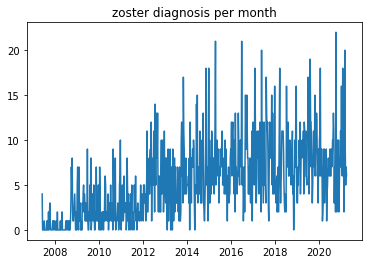

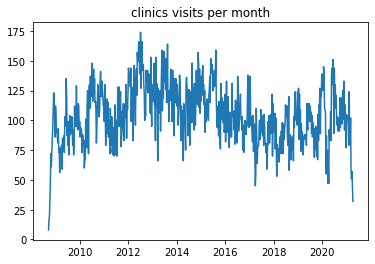

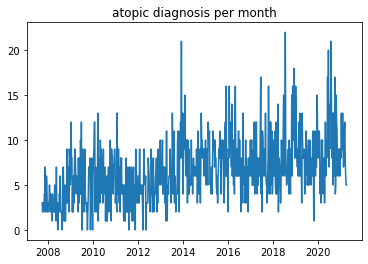

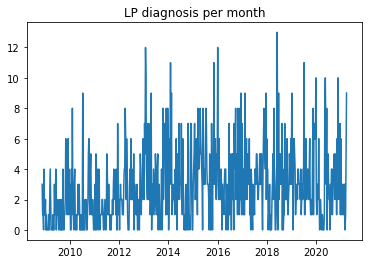

In [9]:
plt.plot(zoster_counts.index,zoster_counts.PatientID)
plt.title('zoster diagnosis per month')
plt.show()

plt.plot(clinics_counts.index,clinics_counts.PatientID)
plt.title('clinics visits per month')
plt.show()

plt.plot(atopic_counts.index,atopic_counts.PatientID)
plt.title('atopic diagnosis per month')
plt.show()

plt.plot(LP_counts.index,LP_counts.PatientID)
plt.title('LP diagnosis per month')
plt.show()


In [40]:
months=['APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','JAN','FEB','MAR']
zoster_last_year=zoster_counts[-12:]
zoster_before_year=zoster_counts[-24:-12]

atopic_last_year=atopic_counts[-12:]
atopic_before_year=atopic_counts[-24:-12]

clinics_last_year=clinics_counts[-12:]
clinics_before_year=clinics_counts[-24:-12]

LP_last_year=LP_counts[-12:]
LP_before_year=LP_counts[-24:-12]


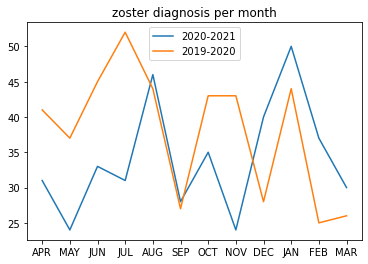

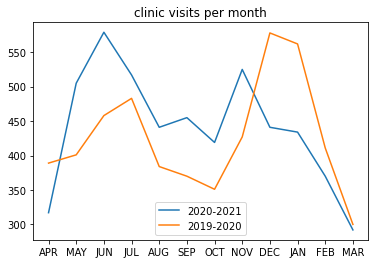

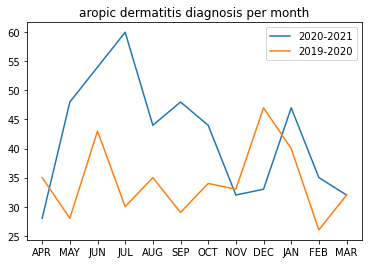

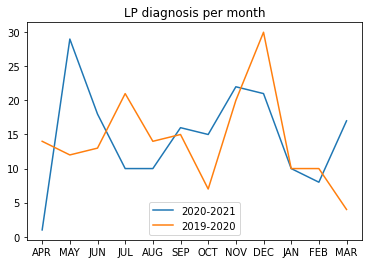

In [41]:
plt.plot(months,zoster_last_year.PatientID)
plt.plot(months,zoster_before_year.PatientID)
plt.legend(labels=['2020-2021','2019-2020'])
plt.title('zoster diagnosis per month')
plt.show()

plt.plot(months,clinics_last_year.PatientID)
plt.plot(months,clinics_before_year.PatientID)
plt.legend(labels=['2020-2021','2019-2020'])
plt.title('clinic visits per month')
plt.show()

plt.plot(months,atopic_last_year.PatientID)
plt.plot(months,atopic_before_year.PatientID)
plt.legend(labels=['2020-2021','2019-2020'])
plt.title('aropic dermatitis diagnosis per month')
plt.show()

plt.plot(months,LP_last_year.PatientID)
plt.plot(months,LP_before_year.PatientID)
plt.legend(labels=['2020-2021','2019-2020'])
plt.title('LP diagnosis per month')
plt.show()

In [42]:
count_table=zoster_counts.merge(clinics_counts, on='date',how='inner')
count_table=count_table.merge(atopic_counts, on='date',how='inner')
count_table=count_table.merge(LP_counts, on='date',how='inner')

count_table.columns=['zoster','clinics','atopic','LP']

count_table['zoster_proportion']=count_table.zoster/count_table.clinics*100
count_table['atopic_proportion']=count_table.atopic/count_table.clinics*100
count_table['LP_proportion']=count_table.LP/count_table.clinics*100

In [43]:
count_table

,zoster,clinics,atopic,LP,zoster_proportion,atopic_proportion,LP_proportion
date,,,,,,,
2008-11-30,11,397,23,5,2.770781,5.793451,1.259446
2008-12-31,4,497,36,7,0.804829,7.243461,1.408451
2009-01-31,13,397,25,2,3.274559,6.297229,0.503778
2009-02-28,14,338,20,1,4.142012,5.917160,0.295858
2009-03-31,1,309,31,8,0.323625,10.032362,2.588997
...,...,...,...,...,...,...,...
2020-11-30,24,525,32,22,4.571429,6.095238,4.190476
2020-12-31,40,441,33,21,9.070295,7.482993,4.761905
2021-01-31,50,434,47,10,11.520737,10.829493,2.304147


In [44]:
zoster_prop_last_year=count_table.zoster_proportion[-12:]
zoster_prop_before_year=count_table.zoster_proportion[-24:-12]

atopic_prop_last_year=count_table.atopic_proportion[-12:]
atopic_prop_before_year=count_table.atopic_proportion[-24:-12]

LP_prop_last_year=count_table.LP_proportion[-12:]
LP_prop_before_year=count_table.LP_proportion[-24:-12]

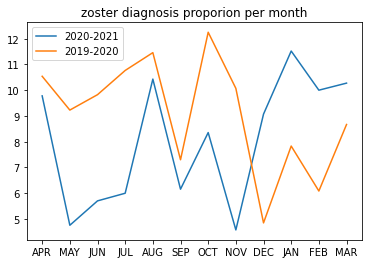

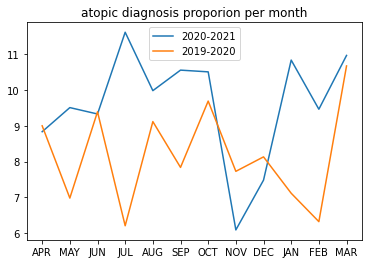

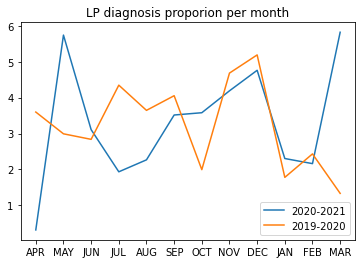

In [45]:
plt.plot(months,zoster_prop_last_year)
plt.plot(months,zoster_prop_before_year)
plt.legend(labels=['2020-2021','2019-2020'])
plt.title('zoster diagnosis proporion per month')
plt.show()

plt.plot(months,atopic_prop_last_year)
plt.plot(months,atopic_prop_before_year)
plt.legend(labels=['2020-2021','2019-2020'])
plt.title('atopic diagnosis proporion per month')
plt.show()

plt.plot(months,LP_prop_last_year)
plt.plot(months,LP_prop_before_year)
plt.legend(labels=['2020-2021','2019-2020'])
plt.title('LP diagnosis proporion per month')
plt.show()

In [62]:
vaccs=[0] + list(vacc_counts.first_dose/100000)

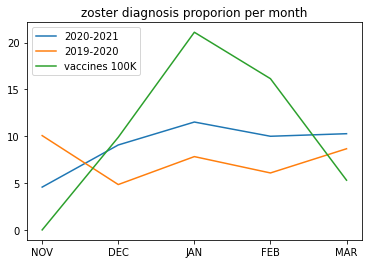

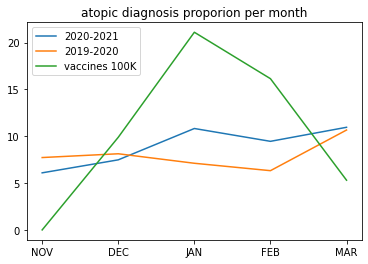

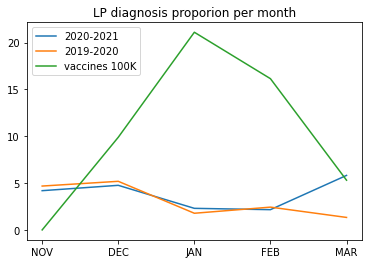

In [69]:
plt.plot(months[-5:],zoster_prop_last_year[-5:])
plt.plot(months[-5:],zoster_prop_before_year[-5:])
plt.plot(months[-5:],vaccs)
plt.legend(labels=['2020-2021','2019-2020','vaccines 100K',])
plt.title('zoster diagnosis proporion per month')
plt.show()

plt.plot(months[-5:],atopic_prop_last_year[-5:])
plt.plot(months[-5:],atopic_prop_before_year[-5:])
plt.plot(months[-5:],vaccs)
plt.legend(labels=['2020-2021','2019-2020','vaccines 100K',])
plt.title('atopic diagnosis proporion per month')
plt.show()

plt.plot(months[-5:],LP_prop_last_year[-5:])
plt.plot(months[-5:],LP_prop_before_year[-5:])
plt.plot(months[-5:],vaccs)
plt.legend(labels=['2020-2021','2019-2020','vaccines 100K',])
plt.title('LP diagnosis proporion per month')
plt.show()


## STATISTICAL TESTS

In [45]:
count_table

,zoster,clinics,atopic,LP,zoster_proportion,atopic_proportion,LP_proportion
date,,,,,,,
2008-11-30,11,397,23,5,2.770781,5.793451,1.259446
2008-12-31,4,497,36,7,0.804829,7.243461,1.408451
2009-01-31,13,397,25,2,3.274559,6.297229,0.503778
2009-02-28,14,338,20,1,4.142012,5.917160,0.295858
2009-03-31,1,309,31,8,0.323625,10.032362,2.588997
...,...,...,...,...,...,...,...
2020-11-30,24,525,32,22,4.571429,6.095238,4.190476
2020-12-31,40,441,33,21,9.070295,7.482993,4.761905
2021-01-31,50,434,47,10,11.520737,10.829493,2.304147


In [70]:
current_year=count_table[['zoster_proportion','atopic_proportion','LP_proportion']].iloc[-4:].values
current_year_values = [item for items in current_year for item in items]

last_year=count_table[['zoster_proportion','atopic_proportion','LP_proportion']].iloc[-16:-12].values
last_year_values = [item for items in last_year for item in items]

In [76]:
stats.ttest_rel(current_year_values, last_year_values)

Ttest_relResult(statistic=3.4523005854190716, pvalue=0.005406067412023368)